# 과소적합 (Underfitting)
과소적합 (Underfitting)은 학습 데이터를 충분히 학습하지 못하여 테스트 성능도 떨어지는 경우를 말합니다.<br><br>

Underfitting을 야기시키는 원인은 아래와 같은 경우가 있습니다.<br>

- 데이터의 개수가 부족한 경우
- 데이터의 Bias가 너무 큰 경우
- 충분한 학습이 부족한 경우
- 데이터에 비해 모델이 너무 단순한 경우
- IMDb 데이터세트를 이용해 기존 모델과 과소적합 모델을 비교해보겠습니다.

이번 실습에서는 데이터 개수와 모델을 조절해보며 과소적합 모델을 학습시켜보고 Train & Test loss가 어떻게 되는지 그래프로 확인해보겠습니다.<br>

관련 링크 https://www.tensorflow.org/beta/tutorials/keras/overfit_and_underfit
# 실습
작성된 코드를 보고 이해해보세요.

1. data_num을 바꿔가며 데이터의 개수에 따라 각 모델의 학습이 어떻게 진행되는지 확인해보세요.
2. keras.layers.Dense()안의 노드 개수를 바꿔가며 모델의 학습이 어떻게 진행되는지 확인해보세요.
3. model.fit() 내부에서 epoch를 바꿔가며 과소적합 되는 모델을 만들어보세요.
4. Visualize() 함수로 Train, Test loss 를 확인하고 과소적합 모델의 결과를 분석해보세요.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

# 각각 리뷰에 따른 데이터 길이가 다르기 때문에 데이터의 Shape을 맞춰줘야합니다.
def sequences_shaping(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # 각 리뷰 별 빈도수가 높은 단어를 dimension 개수 만큼만 추출하여 사용합니다.
        
    return results



# 100번째 까지 많이 사용하는 단어까지 추출
word_num = 100
data_num = None

# Keras에 내장되어 있는 imdb 데이터 세트를 불러옵니다.
# IMDb 데이터 세트는 Train 25000개 test 25000개로 이루어져 있습니다.
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=word_num)

# 데이터 Shape을 맞춰주기 위한 sequence 함수를 불러옵니다.
train_data = sequences_shaping(train_data, dimension=word_num)
test_data = sequences_shaping(test_data, dimension=word_num)

# 메모리 효율 및 과소적합을 위해 데이터 중 data_num개만 사용합니다.
train_data = train_data[:data_num,:]
test_data = test_data[:data_num,:]
train_labels = train_labels[:data_num]
test_labels =test_labels[:data_num]

# 과소적합 경우와 비교하기 위해 기본 모델을 하나 만들어줍니다.

basic_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    # 첫 번째 Layer에 데이터를 넣을때는 input_shape을 맞춰줘야합니다.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(word_num,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    # Regression 이므로 마지막 Node는 1개로 고정해주세요.
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# 과소적합 모델입니다.
underfitting_model = keras.Sequential([
    keras.layers.Dense(2, activation=tf.nn.relu, input_shape=(word_num,)),
    keras.layers.Dense(2, activation=tf.nn.relu),
    # Regression 이므로 마지막 Node는 1개로 고정해주세요.
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# 기존 모델을 학습시킬 최적화 방법, loss 계산 방법, 평가 방법을 설정합니다.
basic_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'binary_crossentropy'])
# 현재 모델이 어떻게 이루어져있는지 출력합니다.
basic_model.summary()
# 모델을 학습시킵니다.
baseline_history = basic_model.fit(train_data,train_labels,epochs=20,batch_size=500,validation_data=(test_data, test_labels), verbose=2)

# 기존 모델을 학습시킬 최적화 방법, loss 계산 방법, 평가 방법을 설정합니다.
underfitting_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'binary_crossentropy'])
# 현재 모델이 어떻게 이루어져있는지 출력합니다.
underfitting_model.summary()
# 모델을 학습시킵니다.
# Epoch를 바꿔가며 모델을 Underfitting 시켜보세요.
underfitting_history = underfitting_model.fit(train_data, train_labels, epochs=20, batch_size=500, validation_data=(test_data, test_labels),verbose=2)


# 각 모델 별 Loss 그래프를 그려줍니다.
Visualize([('basic', baseline_history),('Underfitting', underfitting_history)])
              


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


17465344/17464789 [==============================] - 7s 0us/step


W0724 12:54:58.830668  2824 deprecation.py:323] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                1616      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,905
Trainable params: 1,905
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6823 - accuracy: 0.5598 - binary_crossentropy: 0.6823 - val_loss: 0.6626 - val_accuracy: 0.6058 - val_binary_crossentropy: 0.6626
Epoch 2/20
25000/25000 - 0s - loss: 0.6373 - accuracy: 0.6397 - binary_crossentropy: 0.6373 - val_loss: 0.6153 - val_accuracy: 0.6612 - val_binary_crossentropy: 0.615

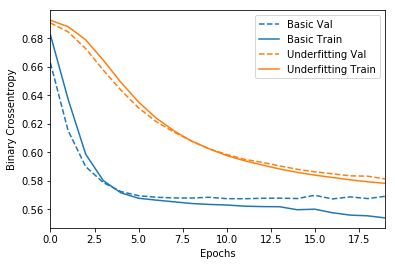

In [2]:
# 시각화 함수
def Visualize(histories, key='binary_crossentropy'):
    #plt.figure(figsize=(,20))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])
    
    plt.show()
    


# 각 모델 별 Loss 그래프를 그려줍니다.
Visualize([('basic', baseline_history),('Underfitting', underfitting_history)])
              